In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score 
from nltk.corpus import stopwords
import re

In [ ]:
file = r'/content/drive/My Drive/final_project.csv'
data=pd.read_csv(file, engine='python')
data.columns=["project"]
rawlist=list(data.project)
print(rawlist)

["A de-duplication task faces two major challenges first one was that the de-dup algorithm has O(n2) complexity. This means time required to get answer will rise exponentially as the number of records increase. This problem was solved using sorted neighborhood approach.\\n Second most important challenge was to achieve tradeoff between precision and recall i.e. improves F1 score. This problem was solved using machine learning techniques after collecting training data.'", "A study to analyze Steel Cast Limited, a forging companys performance in comparison with its peers.\\n Used fundamental analysis of Financial Statements and calculated relevant Financial Ratios to evaluate companys status.\\n Calculated Liquidity, Financing and Performance ratios and compared with the best performer in the sector, Bharat Forge Limited.'", "Achieved a very high PSNR, currently drafting paperforthe results and algorithm.\\n Reconstruction in k-space itself. No superresolution of images. This will make t

In [ ]:
data.project[0]

"A de-duplication task faces two major challenges first one was that the de-dup algorithm has O(n2) complexity. This means time required to get answer will rise exponentially as the number of records increase. This problem was solved using sorted neighborhood approach.\\n Second most important challenge was to achieve tradeoff between precision and recall i.e. improves F1 score. This problem was solved using machine learning techniques after collecting training data.'"

In [ ]:
# cleaning the text
# we need to clean the data in order to get rid of the not relevant words , we need to make a bag of words model which consists of only relevant words
# also apply stemming which is the reducing higher versions of a word to its root level
# the sub method will help us clean the data first parameter means that we will not remove any letter from a-z or A-Z 
import re
project = re.sub('[^a-zA-Z]', ' ', data.project[0])
project


'A de duplication task faces two major challenges first one was that the de dup algorithm has O n   complexity  This means time required to get answer will rise exponentially as the number of records increase  This problem was solved using sorted neighborhood approach  n Second most important challenge was to achieve tradeoff between precision and recall i e  improves F  score  This problem was solved using machine learning techniques after collecting training data  '

In [ ]:
# now we convert all uppercase letters to lowercase
project = project.lower()
project

'a de duplication task faces two major challenges first one was that the de dup algorithm has o n   complexity  this means time required to get answer will rise exponentially as the number of records increase  this problem was solved using sorted neighborhood approach  n second most important challenge was to achieve tradeoff between precision and recall i e  improves f  score  this problem was solved using machine learning techniques after collecting training data  '

In [ ]:
# making our own custom stopwords list
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
project = re.sub('[^a-zA-Z]', ' ', data.project[0])
project = project.lower()
project = project.split()
stopwords = nltk.corpus.stopwords.words('english')
stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
len(stopwords)

179

In [ ]:
# cleaning the text
# split function is used to convert the string into a list of words so that we can with help of a for loop go through different words and see if its relevant or not
# the irrelevant word THIS must be removed after this
# tokenised project words excluding the words from nltk as well as our custom stopwords(3)
import re
import nltk
project = re.sub('[^a-zA-Z]', ' ', data.project[0])
project = project.lower()
project = project.split()
project = [word for word in project if not word in set(stopwords)]
project

['de',
 'duplication',
 'task',
 'faces',
 'two',
 'major',
 'challenges',
 'first',
 'one',
 'de',
 'dup',
 'algorithm',
 'n',
 'complexity',
 'means',
 'time',
 'required',
 'get',
 'answer',
 'rise',
 'exponentially',
 'number',
 'records',
 'increase',
 'problem',
 'solved',
 'using',
 'sorted',
 'neighborhood',
 'approach',
 'n',
 'second',
 'important',
 'challenge',
 'achieve',
 'tradeoff',
 'precision',
 'recall',
 'e',
 'improves',
 'f',
 'score',
 'problem',
 'solved',
 'using',
 'machine',
 'learning',
 'techniques',
 'collecting',
 'training',
 'data']

In [ ]:
# joining back the words to form string
#we use inverted commas with space because we want space between the different words
project = ' '.join(project)
project


'de duplication task faces two major challenges first one de dup algorithm n complexity means time required get answer rise exponentially number records increase problem solved using sorted neighborhood approach n second important challenge achieve tradeoff precision recall e improves f score problem solved using machine learning techniques collecting training data'

In [ ]:
# do the above cleaning process for every review using a for loop
# corpus will be alist containig all the cleaned reviews
# stemming not applied
import re
import nltk
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0,723):
    project = re.sub('[^a-zA-Z]', ' ', data.project[i])
    project = project.lower()
    project = project.split()
    project = [word for word in project if not word in set(stopwords)]
    project = ' '.join(project)
    corpus.append(project)
    #print(corpus) HERE I HAVE NOT  PRINTED THE CORPUS BECAUSE IT WAS SHOWING AN ERROR: IOPub data rate exceeded


In [ ]:
# CORPUS WITHOUT CUSTOM STOPWORDS
corpus

['de duplication task faces two major challenges first one de dup algorithm n complexity means time required get answer rise exponentially number records increase problem solved using sorted neighborhood approach n second important challenge achieve tradeoff precision recall e improves f score problem solved using machine learning techniques collecting training data',
 'study analyze steel cast limited forging companys performance comparison peers n used fundamental analysis financial statements calculated relevant financial ratios evaluate companys status n calculated liquidity financing performance ratios compared best performer sector bharat forge limited',
 'achieved high psnr currently drafting paperforthe results algorithm n reconstruction k space superresolution images make nmri process lot faster n highly sub sampled knee mri data used forthe results packed imaginary nand real parts fourier space real value',
 'achieved accuracy problem solved first time n video classification 

In [ ]:
len(corpus)

723

In [ ]:
# PRINTING ONLY THOSE PROJECTS THAT HAVE A MAXIMUM OF 10 WORDS IN THE CORPUS
split_list14 = []
for i in corpus: 
  temp = i.split(" ")
  if len(temp) <= 10:
    print(temp)
    split_list14.append(temp)

    sentence14 = []
for items in split_list14:
  sentence14.append(' '.join(items))

['achieved', 'accuracy', 'k', 'k', 'parameters', 'used', 'keras', 'n', 'max', 'accuracy']
['name']
['name']
['name']
['name']
['name']
['name']
['name']
['name']
['error']
['error']
['blog', 'learning', 'basics', 'analytics']
['digital', 'assistant', 'written', 'python', 'uses', 'speech', 'recognition', 'obey', 'commands']
['fitness', 'app', 'offering', 'diet', 'exercise', 'plans', 'users']
['fitness', 'app', 'offering', 'diet', 'exercise', 'plans', 'users']
['habit', 'tracking', 'app', 'build', 'using', 'swiftui']
['visualization', 'dashboard', 'different', 'visualizations', 'different', 'parameters']
['altrium', 'quickest', 'service', 'solve', 'homework']
['internal', 'member', 'app', 'dsckiit', 'team']
['iot', 'based', 'biometric', 'project', 'automate', 'process', 'taking', 'attendance']
['analysis', 'baseball', 'player', 'dataset', 'career', 'statistics']
['analytics', 'vidya', 'machine', 'learning', 'contests', 'solutions']
['analyzed', 'titanic', 'dataset', 'kaggle', 'used', 'pr

In [ ]:

len(sentence14)

95

In [ ]:
# PRINTING ONLY THOSE PROJECTS THAT HAVE A MINIMUM OF 15 WORDS IN THE CORPUS
split_list15 = []
for i in corpus: 
  temp = i.split(" ")
  if len(temp) > 10:
    print(temp)
    split_list15.append(temp)

    new_corpus = []
for items in split_list15:
  new_corpus.append(' '.join(items))

['de', 'duplication', 'task', 'faces', 'two', 'major', 'challenges', 'first', 'one', 'de', 'dup', 'algorithm', 'n', 'complexity', 'means', 'time', 'required', 'get', 'answer', 'rise', 'exponentially', 'number', 'records', 'increase', 'problem', 'solved', 'using', 'sorted', 'neighborhood', 'approach', 'n', 'second', 'important', 'challenge', 'achieve', 'tradeoff', 'precision', 'recall', 'e', 'improves', 'f', 'score', 'problem', 'solved', 'using', 'machine', 'learning', 'techniques', 'collecting', 'training', 'data']
['study', 'analyze', 'steel', 'cast', 'limited', 'forging', 'companys', 'performance', 'comparison', 'peers', 'n', 'used', 'fundamental', 'analysis', 'financial', 'statements', 'calculated', 'relevant', 'financial', 'ratios', 'evaluate', 'companys', 'status', 'n', 'calculated', 'liquidity', 'financing', 'performance', 'ratios', 'compared', 'best', 'performer', 'sector', 'bharat', 'forge', 'limited']
['achieved', 'high', 'psnr', 'currently', 'drafting', 'paperforthe', 'result

In [ ]:
# THIS IS OUR NEW CORPUS
new_corpus

['de duplication task faces two major challenges first one de dup algorithm n complexity means time required get answer rise exponentially number records increase problem solved using sorted neighborhood approach n second important challenge achieve tradeoff precision recall e improves f score problem solved using machine learning techniques collecting training data',
 'study analyze steel cast limited forging companys performance comparison peers n used fundamental analysis financial statements calculated relevant financial ratios evaluate companys status n calculated liquidity financing performance ratios compared best performer sector bharat forge limited',
 'achieved high psnr currently drafting paperforthe results algorithm n reconstruction k space superresolution images make nmri process lot faster n highly sub sampled knee mri data used forthe results packed imaginary nand real parts fourier space real value',
 'achieved accuracy problem solved first time n video classification 

In [ ]:
len(new_corpus)

628

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords1 = nltk.corpus.stopwords.words('english')

newStopWords = ['using','used','user','dataset', 'c', 'f', 'n', 'e','type','rating','performing','complete','sample', 'experience','develop','developed','function','design','applications','display','displayed','provide','provided','check','checked','working','high','low', 'current','computing','go','version','level','player','completed','better','level','online','people','management','type','uses','social','working','worked','important','quality','compiler','incorporating','derived','derive','upon','improoved','restaurant','please','standard','diet','refer','order', 'access',   'ease', 'skill', 'slills', 'delivery', 'require', 'required', 'requirement', 'answering', 'design','created', 'creating', 'practices', 'analyzed', 'common', 'successfully',  'adding',  'create', 'technologies', 'development','method','built', 'study', 'studied', 'given', 'review', 'value', 'done', 'result', 'proposed', 'make', 'knowledge', 'apply', 'applied',  'consists', 'description', 'approaches',   'succesfully', 'capable', 'automatically', 'challenge', 'records', 'products', 'repository', 'perform', 'performed', 'detection', 'detect', 'large', 'made', 'scale',  'display', 'video', 'help', 'helped' ,'helping',  'purpose', 'content', 'gives', 'components', 'object',  'methodology', 'problem',  'person', 'book', 'media', 'general' , 'ignore', 'two',  'customer', 'take', 'information', 'users', 'results', 'involved', 'building', 'send', 'workshop',  'team', 'skills', 'basic', 'environment', 'diagrams', 'concepts', 'succesfully', 'whether', 'variables',  'process',  'aim', 'work',  'build',  'customers',   'number', 'work', 'one', 'file', 'approach', 'day', 'related', 'case', 'new', 'benchmark', 'sense', 'iitb', 'tried', 'commands', 'event', 'provides', 'aim',  'existing', 'details', 'etc', 'search', 'food', 'first', 'input', 'output', 'booking', 'received', 'practises', 'kernel', 'loaded', 'efficient', 'detail',  'goal', 'identify', 'find',  'single', 'real', 'sudden', 'location', 'learned', 'part', 'udacity', 'task','techniques','various',  'use', 'system','provide',  'based', 'project', 'product', 'different', 'student', 'objective', 'task', 'report', 'determine', 'performance', 'model', 'data', 'implement', 'implementation', 'application', 'guide', 'prof', 'predict', 'technology', 'jupyter', 'notebook', 'project'  , 'matplotlib', 'seaborn',  'achieved', 'different', 'technique', 'developed',  'implemented', 'worked',  'code', 'document', 'word', 'based',  'google', 'colab', 'github' ]
stopwords1.extend(newStopWords)
stopwords1

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
new_corpus_customsp = []
for i in range(0,628):
  project = new_corpus[i]
  project = project.split()
  project = [word for word in project if not word in set(stopwords1)]
  project = ' '.join(project)
  new_corpus_customsp.append(project)


In [ ]:
new_corpus_customsp

['de duplication faces major challenges de dup algorithm complexity means time get answer rise exponentially increase solved sorted neighborhood second achieve tradeoff precision recall improves score solved machine learning collecting training',
 'analyze steel cast limited forging companys comparison peers fundamental analysis financial statements calculated relevant financial ratios evaluate companys status calculated liquidity financing ratios compared best performer sector bharat forge limited',
 'psnr currently drafting paperforthe algorithm reconstruction k space superresolution images nmri lot faster highly sub sampled knee mri forthe packed imaginary nand parts fourier space',
 'accuracy solved time classification basis position camera flowneta optical flows frames optical flows ndetermine motion camera subject resnet classification',
 'side simple interface machine learning personalize scalable responsive suggests simple job seeker need upload resume list relevant jobs inputs

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(new_corpus_customsp)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT WITH CUSTOM STOPWORDS APPLIED
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
714           learning  0.022896
626              image  0.022333
875            network  0.018623
1072            python  0.017240
882             neural  0.016779
630             images  0.016316
50            analysis  0.015929
39           algorithm  0.015651
1363           trained  0.015488
1346              time  0.014946
726               like  0.014819
10            accuracy  0.014608
488           features  0.014597
57             android  0.014112
69                 app  0.014023
756            machine  0.013823
40          algorithms  0.013622
818             models  0.013613
209     classification  0.013025
335               deep  0.012654
704           language  0.012272
883     neural network  0.011697
757   machine learning  0.011328
1220               set  0.011235
1336              text  0.010888
336      deep learning  0.010564
1056        processing  0.010457
1449           website  0.009597
231                cnn  0.009528
484            feature  0.009353

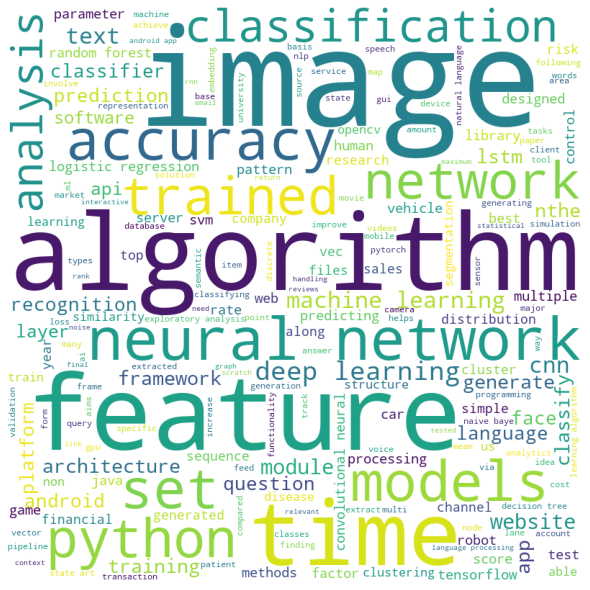

In [ ]:
new_corpus_customsp1 = ' '.join(new_corpus_customsp)

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(new_corpus_customsp1) 
# plot the WordCloud image for corpus with custom stopwords applied                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
tfidf = TfidfVectorizer(
    min_df = 3,
    max_df = 0.7,
    max_features = None,
    stop_words = 'english'
)
tfidf.fit(new_corpus_customsp)
x = tfidf.transform(new_corpus_customsp)
x


<628x1303 sparse matrix of type '<class 'numpy.float64'>'
	with 8982 stored elements in Compressed Sparse Row format>

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


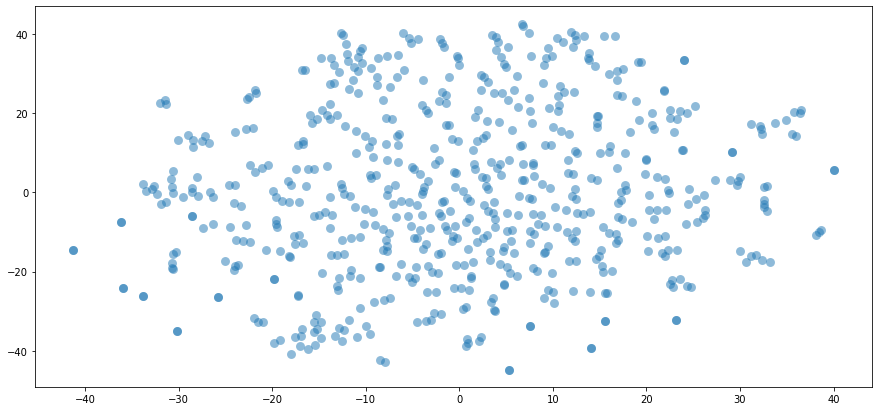

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import pairwise_distances

distance = pairwise_distances(x, metric='cosine')

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 7


projection = TSNE().fit_transform(distance)
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}
plt.scatter(*projection.T, **plot_kwds)

In [ ]:

from sklearn.cluster import Birch
brc = Birch(branching_factor=50, n_clusters = 6, threshold=0.5)
brc.fit(x)
labels = brc.predict(x)
print(labels)

[0 3 3 3 0 3 4 3 3 3 3 1 3 3 3 3 3 0 4 4 4 4 4 4 3 4 4 4 3 3 0 1 3 0 3 3 1
 0 0 4 3 1 1 3 5 4 1 0 0 3 0 0 0 3 3 3 0 3 1 1 2 1 0 1 3 3 3 3 1 0 1 3 3 3
 4 3 4 0 0 3 1 3 1 4 1 4 3 3 4 3 3 3 0 0 3 4 3 0 3 3 0 0 3 3 0 3 1 0 0 3 4
 3 4 3 0 1 3 3 3 0 3 3 1 3 3 0 3 2 0 3 0 1 3 3 3 1 3 4 1 3 3 3 0 3 3 3 3 0
 1 3 0 2 3 4 3 3 0 0 3 4 0 3 0 1 3 3 3 0 3 3 1 0 5 5 3 5 5 3 0 3 3 3 5 4 4
 4 3 0 3 0 0 4 3 2 2 3 3 3 4 3 3 0 1 3 4 3 3 0 1 3 3 1 0 4 1 0 3 1 1 1 3 3
 0 3 3 3 1 3 0 3 0 1 0 0 3 3 3 3 0 5 2 1 2 0 2 2 3 3 3 2 2 3 3 5 5 4 4 0 0
 1 3 1 3 3 3 2 2 3 1 0 2 4 0 1 1 0 0 3 3 3 2 3 0 0 1 3 1 3 0 3 3 0 3 0 5 0
 2 0 0 3 5 5 3 3 0 3 3 3 3 0 3 2 2 3 3 3 3 1 3 3 1 3 0 3 5 5 1 2 4 3 4 5 3
 5 4 3 0 3 3 3 3 1 0 1 3 3 3 0 3 4 0 0 1 1 3 3 0 3 1 1 1 3 3 1 0 3 0 0 0 2
 3 2 2 4 3 1 0 3 3 3 3 0 5 3 3 1 3 3 3 3 2 3 4 0 3 0 1 0 3 3 0 0 3 3 3 0 3
 3 3 0 3 0 3 5 3 3 0 0 3 3 4 4 3 4 1 0 5 3 0 3 0 2 3 4 4 1 4 0 0 3 3 2 2 2
 3 3 3 3 3 3 2 0 0 0 3 0 1 3 0 3 3 2 2 3 3 5 0 3 3 3 0 1 3 4 5 3 0 3 3 1 3
 4 4 3 0 3 3 4 1 3 3 3 3 

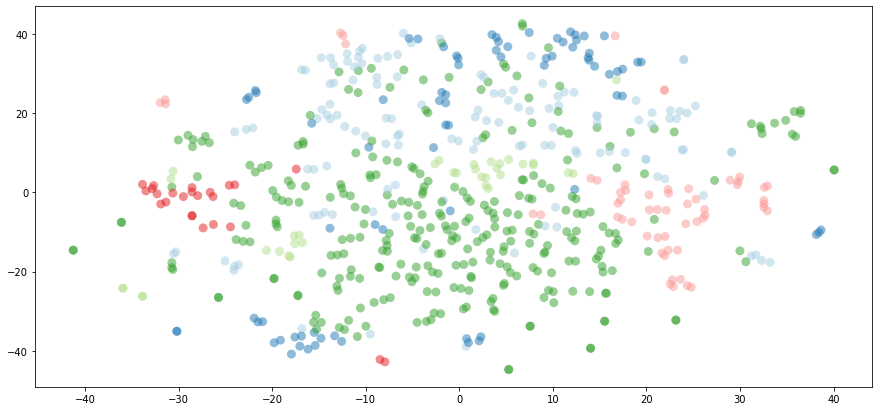

In [ ]:
color_palette = sns.color_palette('Paired', 20)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in labels]
cluster_member_colors = (cluster_colors)
plt.scatter(*projection.T, s=80, linewidth=0, c=cluster_member_colors, alpha=0.5)

In [ ]:
no_of_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10] 
  
for n_clusters in no_of_clusters: 
  
    cluster = Birch(n_clusters = n_clusters) 
    cluster_labels = cluster.fit_predict(x) 
  
    # The silhouette_score gives the  
    # average value for all the samples. 
    silhouette_avg = silhouette_score(x, cluster_labels) 
  
    print("For no of clusters =", n_clusters, 
          " The average silhouette_score is :", silhouette_avg) 

For no of clusters = 2  The average silhouette_score is : 0.00262291474893421
For no of clusters = 3  The average silhouette_score is : 0.0030160602985787786
For no of clusters = 4  The average silhouette_score is : 0.003937511253718387
For no of clusters = 5  The average silhouette_score is : 0.0043226312401581455
For no of clusters = 6  The average silhouette_score is : 0.005612061204889155
For no of clusters = 7  The average silhouette_score is : 0.005438649079639946
For no of clusters = 8  The average silhouette_score is : 0.004339422279564538
For no of clusters = 9  The average silhouette_score is : 0.0014246996231835544
For no of clusters = 10  The average silhouette_score is : 0.0006177067480497529


In [ ]:
#first cluster
list1 = []
for i in range(len(labels)):
    if labels[i] == 0:
        list1.append(new_corpus_customsp[i])
    # no of projects in cluster 1
len(list1)

131

In [ ]:
#projects in cluster 1
list1

['de duplication faces major challenges de dup algorithm complexity means time get answer rise exponentially increase solved sorted neighborhood second achieve tradeoff precision recall improves score solved machine learning collecting training',
 'side simple interface machine learning personalize scalable responsive suggests simple job seeker need upload resume list relevant jobs inputs achieve scalable web crawler get job descriptions websites job descriptions resume processed text mining extract finally predictive jobs similar resume',
 'credit risk validation engagements aimed making banks basel ii compliant engagements broken preparation stage validation stage preparation step included creation list co ordination client get ensure correctness validation stage included validation',
 'bidirectional autoencoder extracted context nreference get softmax probabilities possible answers question extracted edges relations commonsense corporas like conceptnet nell making commonsense inclus

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list1)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT FOR PROJECTS WITH MINIMUM 15 WORDS
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(40)

term    weight
103          learning  0.074338
117           machine  0.050956
118  machine learning  0.043297
222              text  0.040730
32     classification  0.036755
108              like  0.036753
2            accuracy  0.035841
230           trained  0.034571
7            analysis  0.034027
128            models  0.033217
6          algorithms  0.029381
48               deep  0.027617
97           language  0.026912
140           network  0.025139
49      deep learning  0.024517
75            genetic  0.024321
178          question  0.024073
142            neural  0.023594
35           classify  0.023350
184              rank  0.023115
195             score  0.022303
240               vec  0.021377
200         sentiment  0.020377
86              image  0.020182
5           algorithm  0.019753
179         questions  0.019469
31            classes  0.019289
189        regression  0.019173
209        similarity  0.019070
71           features  0.019042
193           reviews  0.018975
231          training  0.018970
237        validation  0.018814
116              lstm  0.018631
199          semantic  0.018518
175            python  0.018378
210        simulation  0.018342
87             images  0.018216
88            improve  0.017818
212             state  0.017562

In [ ]:
list10 = ' '.join(list1)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list10)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of de is : 2
Frequency of duplication is : 1
Frequency of faces is : 2
Frequency of major is : 6
Frequency of challenges is : 1
Frequency of dup is : 1
Frequency of algorithm is : 11
Frequency of complexity is : 1
Frequency of means is : 1
Frequency of time is : 10
Frequency of get is : 12
Frequency of answer is : 8
Frequency of rise is : 1
Frequency of exponentially is : 1
Frequency of increase is : 4
Frequency of solved is : 2
Frequency of sorted is : 1
Frequency of neighborhood is : 1
Frequency of second is : 1
Frequency of achieve is : 8
Frequency of tradeoff is : 1
Frequency of precision is : 3
Frequency of recall is : 4
Frequency of improves is : 1
Frequency of score is : 10
Frequency of machine is : 31
Frequency of learning is : 57
Frequency of collecting is : 1
Frequency of training is : 10
Frequency of side is : 1
Frequency of simple is : 3
Frequency of interface is : 1
Frequency of personalize is : 1
Frequency of scalable is : 2
Frequency of responsive is : 1
Freque

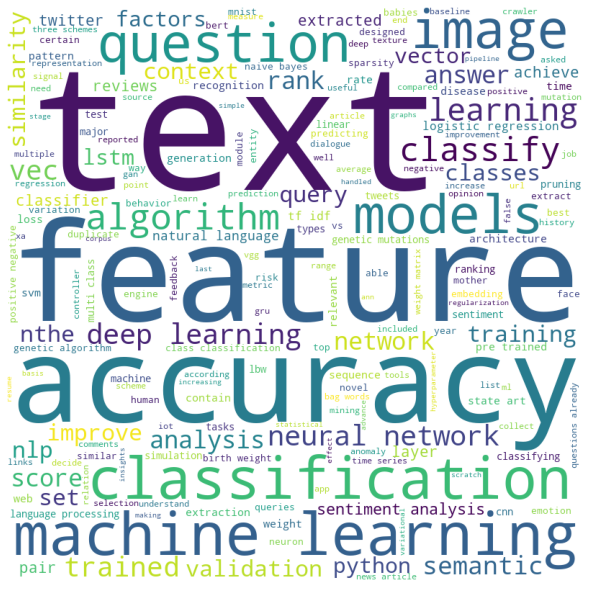

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list10) 
# plot the WordCloud image for cluster 1 min_words = 15                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list2 = []
for i in range(len(labels)):
    if labels[i] == 1:
        list2.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list2)

78

In [ ]:
list2

['end end pipeline abnormalities chest x ray top chexpert chest x ray competition nhttps stanfordmlgroup io competitions chexpert stanford datasets chest x ray images multiple image processing balancing adaptive histogram equalization augmentation classification densenet architecture improving accuracy disease ensemble models',
 'cbir inria holidays colour histogram image ndescriptor extract features images indexed images image descriptor stored csv chi squared distance metric similarity images returned top nresults matching query image introducing deep neural network extract features nunderstanding rather image composition',
 'chunking maximum entropy models koe https www aclweb org anthology w pdf baseline selects chunk tag frequently associated nthe speech tag',
 'works network embedding consider network structure generated could potentially nhelpful learning joint network representation aims embed network nodes latent dimensional space keeping mind following properties embeddings a

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list2)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
51                  image  0.114015
54                 images  0.096625
72                network  0.084046
76                 neural  0.080907
111               trained  0.062619
77         neural network  0.061557
75               networks  0.047683
35                   face  0.047498
20                    cnn  0.045348
60               learning  0.043812
28                   deep  0.043738
43               generate  0.037523
7            architecture  0.036596
116              vehicles  0.035309
17         classification  0.034391
62                   lstm  0.034069
23          convolutional  0.032895
78        neural networks  0.032723
93                 python  0.032697
29          deep learning  0.032581
39               features  0.031038
32             embeddings  0.030662
12                 breast  0.029697
14                 cancer  0.029523
100            resolution  0.029348
16                  class  0.029249
58               language  0.029018
50                  human  0.028012
24   convolutional neural  0.027829
107            tensorflow  0.027739

In [ ]:
list20 = ' '.join(list2)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list20)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of end is : 4
Frequency of pipeline is : 5
Frequency of abnormalities is : 1
Frequency of chest is : 3
Frequency of x is : 10
Frequency of ray is : 5
Frequency of top is : 3
Frequency of chexpert is : 2
Frequency of competition is : 1
Frequency of nhttps is : 1
Frequency of stanfordmlgroup is : 1
Frequency of io is : 1
Frequency of competitions is : 1
Frequency of stanford is : 1
Frequency of datasets is : 3
Frequency of images is : 46
Frequency of multiple is : 6
Frequency of image is : 53
Frequency of processing is : 7
Frequency of balancing is : 1
Frequency of adaptive is : 1
Frequency of histogram is : 2
Frequency of equalization is : 1
Frequency of augmentation is : 3
Frequency of classification is : 12
Frequency of densenet is : 1
Frequency of architecture is : 9
Frequency of improving is : 2
Frequency of accuracy is : 8
Frequency of disease is : 4
Frequency of ensemble is : 1
Frequency of models is : 9
Frequency of cbir is : 1
Frequency of inria is : 1
Frequency of hol

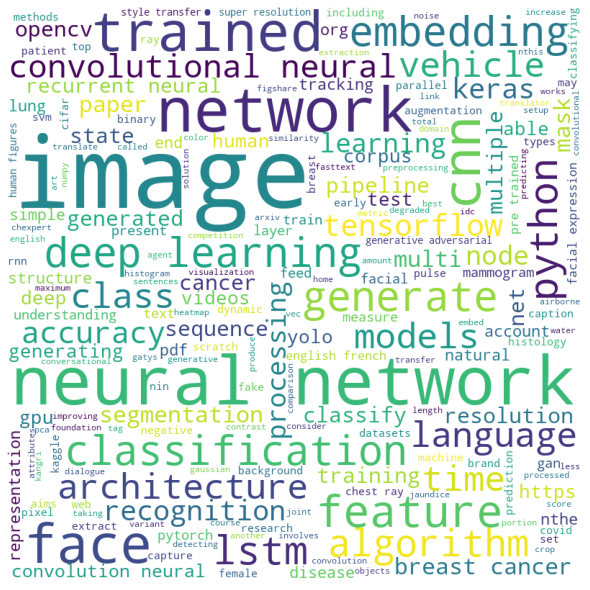

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list20) 
# plot the WordCloud image for cluster 1 min_words = 20                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list3 = []
for i in range(len(labels)):
    if labels[i] == 2:
        list3.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list3)

35

In [ ]:
list3

['indiana university columbia asia chest x ray reports training dbscan k means clustering finding similarity sentences bert paper generating reports secondly image captioning generating reports images trained along reports',
 'distributed database front end insert view delete patient nfragmented tables distributing state wise sqlplus oracle db php javascript w css',
 'website showcase photography interested photographers nthe website html css javascript ncurrently website four contributors photographs ni server side website respond requests feedback nhave look recommended view laptop desktop nwww pixelstarlab com',
 'went live onto yahoo website regularly alerts generated discrepancy ntechnologies java pig hadoop big',
 'went live onto yahoo website regularly alerts generated discrepancy ntechnologies java pig hadoop big',
 'connecting startups providing web platform company profile companys profile add reviews earn premium deal bonuses nmade w css framework javascript ajax php mysql',

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list3)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
31        website  0.163454
16           java  0.153956
21          mysql  0.103397
23            php  0.101627
10            gui  0.084107
29         server  0.084015
7             end  0.080162
24      php mysql  0.077364
20           like  0.076116
18     javascript  0.074367
9       framework  0.060013
22  ntechnologies  0.055023
8        features  0.053441
28        reports  0.052874
30       students  0.051916
3             css  0.049830
19          later  0.048285
5        database  0.047850
1         clients  0.047297
6        designed  0.046874
2         college  0.045048
13       handling  0.043665
14           html  0.041690
32   website like  0.040270
26     pig hadoop  0.039048
0             big  0.039048
17       java pig  0.039048
25            pig  0.039048
12     hadoop big  0.039048
11         hadoop  0.039048

In [ ]:
list30 = ' '.join(list3)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list30)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of indiana is : 1
Frequency of university is : 2
Frequency of columbia is : 1
Frequency of asia is : 1
Frequency of chest is : 1
Frequency of x is : 2
Frequency of ray is : 1
Frequency of reports is : 6
Frequency of training is : 1
Frequency of dbscan is : 1
Frequency of k is : 1
Frequency of means is : 1
Frequency of clustering is : 1
Frequency of finding is : 1
Frequency of similarity is : 1
Frequency of sentences is : 1
Frequency of bert is : 1
Frequency of paper is : 1
Frequency of generating is : 3
Frequency of secondly is : 1
Frequency of image is : 2
Frequency of captioning is : 1
Frequency of images is : 1
Frequency of trained is : 2
Frequency of along is : 2
Frequency of distributed is : 1
Frequency of database is : 4
Frequency of front is : 2
Frequency of end is : 6
Frequency of insert is : 1
Frequency of view is : 2
Frequency of delete is : 1
Frequency of patient is : 1
Frequency of nfragmented is : 1
Frequency of tables is : 2
Frequency of distributing is : 1
Freq

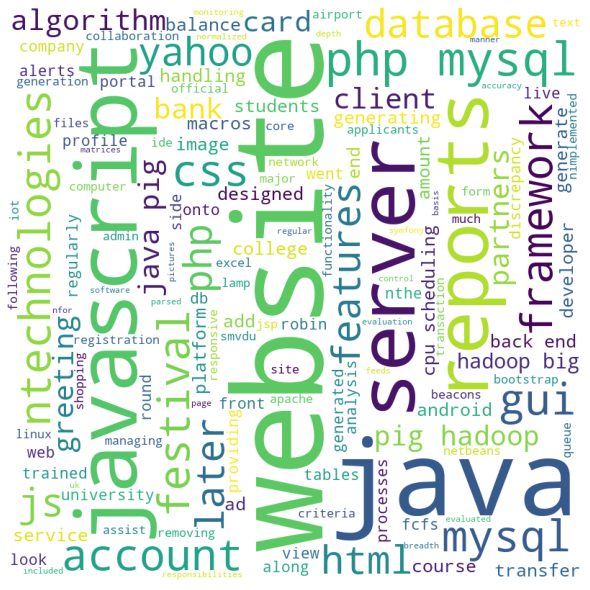

In [ ]:
list30 = ' '.join(list3)

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list30) 
# plot the WordCloud image for corpus with custom stopwords applied                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list4 = []
for i in range(len(labels)):
    if labels[i] == 3:
        list4.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list4)

302

In [ ]:
list4

['analyze steel cast limited forging companys comparison peers fundamental analysis financial statements calculated relevant financial ratios evaluate companys status calculated liquidity financing ratios compared best performer sector bharat forge limited',
 'psnr currently drafting paperforthe algorithm reconstruction k space superresolution images nmri lot faster highly sub sampled knee mri forthe packed imaginary nand parts fourier space',
 'accuracy solved time classification basis position camera flowneta optical flows frames optical flows ndetermine motion camera subject resnet classification',
 'american sign language primary language north america deaf individuals also hard hearing individuals language employs signs hand along facial gestures bodily pastures images contained hand gestures encoded alphabetic letters trained convolutional neural network classify images asl letters loading examining preprocessing trained network tested',
 'analyzing millions financial fraudulent 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list4)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
19        algorithm  0.025056
526          python  0.024389
660            time  0.022414
23         analysis  0.017398
323           image  0.017212
595             set  0.016049
245        features  0.015207
370        learning  0.014999
519      processing  0.014776
276            game  0.014404
20       algorithms  0.013912
364        language  0.012999
104      classifier  0.012753
373         library  0.012406
375            like  0.012325
36              app  0.012235
6          accuracy  0.012188
611        software  0.011898
415          models  0.011823
436         network  0.011370
651            test  0.011344
495        platform  0.011254
561           robot  0.011110
537     recognition  0.010788
83              car  0.010660
110      clustering  0.010614
478      parameters  0.010186
244         feature  0.009922
539  recommendation  0.009696
35              api  0.009654

In [ ]:
list40 = ' '.join(list4)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list40)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of analyze is : 4
Frequency of steel is : 1
Frequency of cast is : 1
Frequency of limited is : 4
Frequency of forging is : 1
Frequency of companys is : 2
Frequency of comparison is : 1
Frequency of peers is : 2
Frequency of fundamental is : 1
Frequency of analysis is : 32
Frequency of financial is : 10
Frequency of statements is : 1
Frequency of calculated is : 4
Frequency of relevant is : 3
Frequency of ratios is : 2
Frequency of evaluate is : 3
Frequency of status is : 2
Frequency of liquidity is : 1
Frequency of financing is : 1
Frequency of compared is : 9
Frequency of best is : 8
Frequency of performer is : 1
Frequency of sector is : 1
Frequency of bharat is : 1
Frequency of forge is : 1
Frequency of psnr is : 1
Frequency of currently is : 6
Frequency of drafting is : 2
Frequency of paperforthe is : 1
Frequency of algorithm is : 45
Frequency of reconstruction is : 5
Frequency of k is : 12
Frequency of space is : 6
Frequency of superresolution is : 1
Frequency of images i

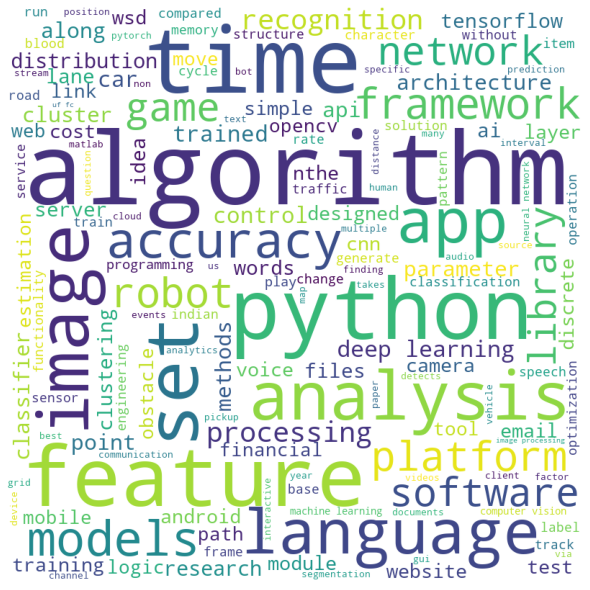

In [ ]:
list40 = ' '.join(list4)

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list40) 
# plot the WordCloud image for corpus with custom stopwords applied                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list5 = []
for i in range(len(labels)):
    if labels[i] == 4:
        list5.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list5)

58

In [ ]:
list5

['leading telecom firm predictive models risk churn main indicators churn filtered revenue generate telecom firm tagging churned service usage models risk churned also strong indicators churn',
 'reviews cleaning visualization predicting sentiments reviews algorithms multinomial naive baye python accuracy end end web app link https tinyurl com sentiment',
 'top headlines date cleaning visualization predicting stock price news headlines algorithms logistic regression random forest multinomial naive bayes python accuracy',
 'sms messages cleaning visualization predicting sms spam ham algorithms multinomial naive bayes python accuracy end end web app link https tinyurl com spam sms detector',
 'taken kaggle com news headlines cleaning visualization predicting news fake algorithms logistic regression multinomial naive bayes python accuracy',
 'taken kaggle com movie scripts script words associated genre cleaning visualization predicting genre movie words script algorithms multinomial naive

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=2, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list5)
#HAD TO CHANGE THE MIN_DF
# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
243                sales  0.053972
238                 risk  0.047127
228           regression  0.046161
222               random  0.044313
18              analysis  0.042854
49              cleaning  0.041252
11            algorithms  0.039930
223        random forest  0.039817
98                forest  0.039817
211           prediction  0.038427
209            predicted  0.037009
215                price  0.036673
1               accuracy  0.036214
166             modeling  0.035867
53               company  0.035830
175                movie  0.035704
219               python  0.035588
143             logistic  0.033990
144  logistic regression  0.033990
89              features  0.033379
171               models  0.032213
62              decision  0.031578
253                  set  0.031539
279                 tree  0.030179
210           predicting  0.029688
260                stock  0.028556
142                 loan  0.028294
44                 churn  0.026620
63         decision tree  0.026122
162                   ml  0.025715

In [ ]:
list50 = ' '.join(list5)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list50)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of leading is : 2
Frequency of telecom is : 2
Frequency of firm is : 5
Frequency of predictive is : 5
Frequency of models is : 12
Frequency of risk is : 13
Frequency of churn is : 6
Frequency of main is : 1
Frequency of indicators is : 2
Frequency of filtered is : 1
Frequency of revenue is : 2
Frequency of generate is : 2
Frequency of tagging is : 1
Frequency of churned is : 2
Frequency of service is : 1
Frequency of usage is : 2
Frequency of also is : 3
Frequency of strong is : 1
Frequency of reviews is : 2
Frequency of cleaning is : 15
Frequency of visualization is : 8
Frequency of predicting is : 10
Frequency of sentiments is : 1
Frequency of algorithms is : 19
Frequency of multinomial is : 5
Frequency of naive is : 6
Frequency of baye is : 1
Frequency of python is : 15
Frequency of accuracy is : 15
Frequency of end is : 8
Frequency of web is : 5
Frequency of app is : 4
Frequency of link is : 5
Frequency of https is : 4
Frequency of tinyurl is : 3
Frequency of com is : 6
F

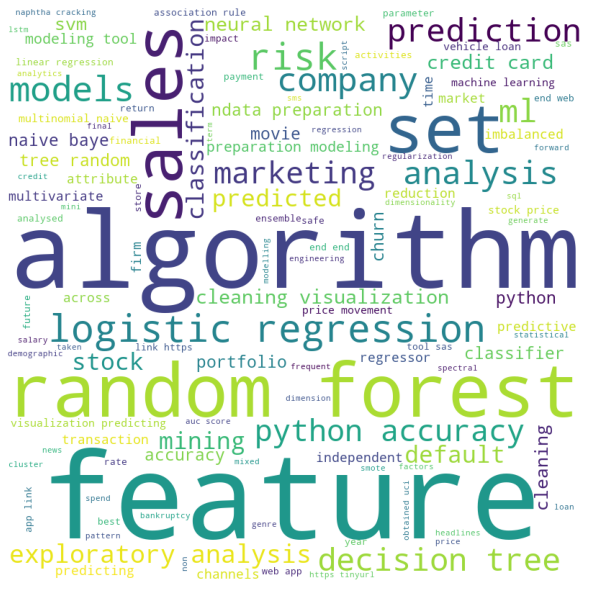

In [ ]:
list50 = ' '.join(list5)

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list50) 
# plot the WordCloud image for corpus with custom stopwords applied                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list6 = []
for i in range(len(labels)):
    if labels[i] == 5:
        list6.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list6)

24

In [ ]:
list6

['leading contributors python library poliastro astrodynamics npython dedicated problems orbit propagation solution lamberts nproblem conversion position velocity vectors classical orbital nelements orbit plotting focusing interplanetary contributions api plotting module addition frame nreference multiple bug fixes gave talk poliastro pycon india poliastro usually tested linux windows added bot automation support issues wrote wrapper around nastroquery querying neos currently contributing ndastcom query module nasa sponsored sbpy',
 'android app guides visually impaired recognizing objects smartphone camera time app text speech give objects detected class recognizes human faces attributes like age gender emotion app also recognizes text image ntools ssd mobilenet v cnn microsoft cognitive face api recognizing face attributes firebase ml kit ocr tensorflow lite converter api android app',
 'android app helps visually impaired navigate another phone',
 'android suggests recipes scanning 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list6)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
1          android  0.310117
5              app  0.286571
11          module  0.178923
2      android app  0.126230
4              api  0.107782
7         features  0.080722
9            india  0.078217
15         network  0.062601
0         advanced  0.061558
16          neural  0.060021
10             map  0.050252
20            time  0.049054
13            nano  0.046597
14     nano degree  0.046597
6           degree  0.046597
3     android nano  0.046597
17  neural network  0.046134
19      smartphone  0.045044
12        multiple  0.044765
8            image  0.044451
18         program  0.022177

In [ ]:
list60 = ' '.join(list6)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list60)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of leading is : 1
Frequency of contributors is : 1
Frequency of python is : 1
Frequency of library is : 1
Frequency of poliastro is : 3
Frequency of astrodynamics is : 1
Frequency of npython is : 1
Frequency of dedicated is : 1
Frequency of problems is : 1
Frequency of orbit is : 2
Frequency of propagation is : 1
Frequency of solution is : 1
Frequency of lamberts is : 1
Frequency of nproblem is : 1
Frequency of conversion is : 1
Frequency of position is : 1
Frequency of velocity is : 1
Frequency of vectors is : 1
Frequency of classical is : 1
Frequency of orbital is : 1
Frequency of nelements is : 1
Frequency of plotting is : 2
Frequency of focusing is : 1
Frequency of interplanetary is : 1
Frequency of contributions is : 1
Frequency of api is : 8
Frequency of module is : 21
Frequency of addition is : 1
Frequency of frame is : 1
Frequency of nreference is : 1
Frequency of multiple is : 3
Frequency of bug is : 1
Frequency of fixes is : 1
Frequency of gave is : 1
Frequency of t

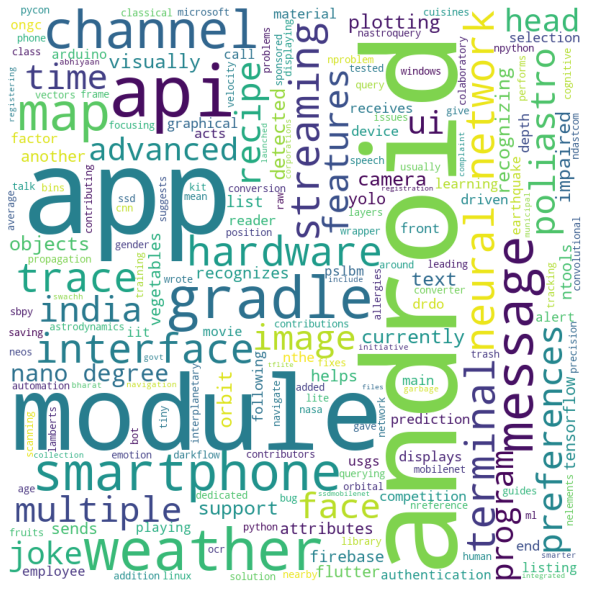

In [ ]:
list60 = ' '.join(list6)

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list60) 
# plot the WordCloud image for corpus with custom stopwords applied                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 